<a href="https://colab.research.google.com/github/kishore-1812/basic-nn-model/blob/main/copy_of_nn_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Authenticate User**

In [3]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

# **Open the Google sheet and convert into DataFrame**

In [6]:
data = pd.read_csv("/content/sample_data/random_dataset.csv")

df = pd.DataFrame(data = data)
df.head()

,input,output
0,66,669
1,5,59
2,10,109
3,27,279
4,1,19


In [7]:
df.head(20)

,input,output
0,66,669
1,5,59
2,10,109
3,27,279
4,1,19
5,91,919
6,88,889
7,15,159
8,100,1009
9,140,1409


In [11]:
X = df[["input "]].values
Y = df[["output"]].values
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=50)

In [13]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)
Scaler.fit(X_test)

MinMaxScaler()

In [15]:
modified_train_x = Scaler.transform(X_train)
modified_test_x = Scaler.transform(X_test)

In [16]:
model = Sequential([
    Dense(9,activation='relu'),
    Dense(15,activation='relu'),
    Dense(1)
])

In [18]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(modified_train_x,y_train,epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 10ms/step - loss: 3397548.2500
Epoch 2502/5000
1/1 [==============================] - 0s 9ms/step - loss: 3393762.5000
Epoch 2503/5000
1/1 [==============================] - 0s 9ms/step - loss: 3389977.7500
Epoch 2504/5000
1/1 [==============================] - 0s 13ms/step - loss: 3386193.7500
Epoch 2505/5000
1/1 [==============================] - 0s 8ms/step - loss: 3382414.2500
Epoch 2506/5000
1/1 [==============================] - 0s 13ms/step - loss: 3378640.5000
Epoch 2507/5000
1/1 [==============================] - 0s 8ms/step - loss: 3374870.7500
Epoch 2508/5000
1/1 [==============================] - 0s 8ms/step - loss: 3371103.5000
Epoch 2509/5000
1/1 [==============================] - 0s 11ms/step - loss: 3367343.7500
Epoch 2510/5000
1/1 [==============================] - 0s 13ms/step - loss: 3363586.2500
Epoch 2511/5000
1/1 [==============================] - 0s 6ms/step - loss: 33598

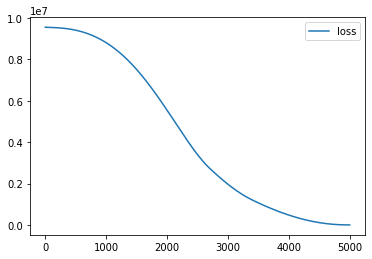

In [19]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [20]:
model.evaluate(modified_test_x,y_test)

1/1 [==============================] - 0s 135ms/step - loss: 0.7379


0.7378836274147034

In [21]:
pred1 = [[78]]
pred_trans = Scaler.transform(pred1)

In [22]:
model.predict(pred_trans)

array([[789.1995]], dtype=float32)